In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.contingency_tables import cochrans_q, mcnemar

## Data processing

In [26]:
#Importer dataset
df = pd.read_csv('LLM_Dataset_.csv')
df = df[0:165]
df

,Question number,ChatGPT,Gemini,Perplexity,Claude,Correct answers,Eksamenssæt
0,1,A,B,C,B,B,"""Maj 2020"""
1,2,C,C,A,A,A,NaN
2,3,B,A,B,B,A,NaN
3,4,A,A,A,A,A,NaN
4,5,D,E,C,C,C,NaN
...,...,...,...,...,...,...,...
158,10,E,D,E,E,E,NaN
159,11,B,B,A,C,B,NaN
160,12,C,B,C,C,C,NaN
161,13,C,B+D,C,G,D,NaN


In [27]:
#Calculate all correct answers
GPT4o_correct = df['ChatGPT']==df['Correct answers']
Gemini_correct = df['Gemini']==df['Correct answers']
Perplexity_correct = df['Perplexity']==df['Correct answers']
Claude_correct = df['Claude']==df['Correct answers']

#Example of correct list
print(GPT4o_correct[0:10])
len(GPT4o_correct)

0    False
1    False
2    False
3     True
4    False
5     True
6     True
7     True
8    False
9     True
dtype: bool


163

## Data evaluation

In [28]:
#Calculate and print accuracy for each
print("ChatGPT 4o accuracy:", np.mean(GPT4o_correct))
print("Gemini accuracy:", np.mean(Gemini_correct))
print("Perplexity accuracy:", np.mean(Perplexity_correct))
print("Claude accuracy:", np.mean(Claude_correct))

ChatGPT 4o accuracy: 0.6319018404907976
Gemini accuracy: 0.6932515337423313
Perplexity accuracy: 0.6441717791411042
Claude accuracy: 0.6012269938650306


In [29]:
#Calculate upper and lower bound of 95% confidensintercal
print("ChatGPT 4o upper and lower bound:",proportion_confint(np.sum(GPT4o_correct), len(GPT4o_correct)))
print("Gemini upper and lower bound:",proportion_confint(np.sum(Gemini_correct), len(Gemini_correct)))
print("Perplexity upper and lower bound:",proportion_confint(np.sum(Perplexity_correct), len(Perplexity_correct)))
print("Claude upper and lower bound:",proportion_confint(np.sum(Claude_correct), len(Claude_correct)))

ChatGPT 4o upper and lower bound: (0.5578627761186297, 0.7059409048629655)
Gemini upper and lower bound: (0.6224584373274412, 0.7640446301572213)
Perplexity upper and lower bound: (0.570673811406816, 0.7176697468753925)
Claude upper and lower bound: (0.5260584044390468, 0.6763955832910145)


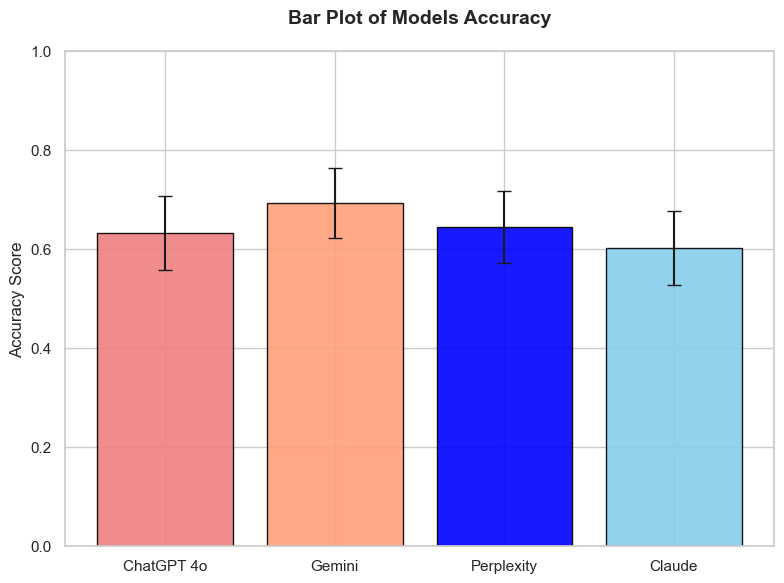

In [30]:
#Data
models = ['ChatGPT 4o', 'Gemini', 'Perplexity', 'Claude']
accuracy = [0.6319018404907976,0.6932515337423313 , 0.6441717791411042, 0.6012269938650306]
lower_bound = [0.6012269938650306, 0.6224584373274412, 0.570673811406816, 0.5260584044390468]
upper_bound = [0.7059409048629655, 0.7640446301572213, 0.7176697468753925, 0.6763955832910145]

#Calculate the errors
error = [upper - acc for upper, acc in zip(upper_bound, accuracy)]

#Set the Seaborn style
sns.set(style="whitegrid")
colors = ['#F08080', '#FFA07A', '#0000FF', '#87CEEB']  

#Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(
    models, 
    accuracy, 
    yerr=error, 
    capsize=5, 
    color=colors, 
    edgecolor="black", 
    alpha=0.9
)

#Customize the plot
plt.ylim(0, 1)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Bar Plot of Models Accuracy', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()

#Show the plot
plt.show()


In [31]:
print(cochrans_q([GPT4o_correct,Gemini_correct,Perplexity_correct,Claude_correct]))

df          162
pvalue      8.540832335611768e-19
statistic   373.9005351996706


In [32]:
Posthoc = pd.crosstab(GPT4o_correct, Gemini_correct)
print(mcnemar(Posthoc))

Posthoc = pd.crosstab(GPT4o_correct, Perplexity_correct)
print(mcnemar(Posthoc))

Posthoc = pd.crosstab(GPT4o_correct, Claude_correct)
print(mcnemar(Posthoc))

Posthoc = pd.crosstab(Gemini_correct, Perplexity_correct)
print(mcnemar(Posthoc))

Posthoc = pd.crosstab(Gemini_correct, Claude_correct)
print(mcnemar(Posthoc))

Posthoc = pd.crosstab(Perplexity_correct, Claude_correct)
print(mcnemar(Posthoc))

pvalue      0.16414940178310644
statistic   16.0
pvalue      0.860050065908581
statistic   15.0
pvalue      0.542384011856484
statistic   19.0
pvalue      0.3222363203575469
statistic   21.0
pvalue      0.03998605682605215
statistic   16.0
pvalue      0.34888887944907765
statistic   17.0


## Perplexity potential

In [33]:
# Initialize counters
GPT4o_Perplexity_correct = 0
GPT4o_Perplexity_wrong = 0

GPT4o_Claude_correct = 0
GPT4o_Claude_wrong = 0

Perplexity_Claude_correct = 0
Perplexity_Claude_wrong = 0

All_3_correct = 0
All_3_wrong = 0

# Iterate through the Data
for index, row in df.iterrows():
    # Check conditions and to counters
    if row['ChatGPT'] == row['Perplexity'] == row['Correct answers'] and row['Claude'] != row['Correct answers']:
        GPT4o_Perplexity_correct += 1
    elif row['ChatGPT'] != row['Correct answers'] and row['Perplexity'] != row['Correct answers'] and row['Claude'] == row['Correct answers']:
        GPT4o_Perplexity_wrong += 1
    elif row['ChatGPT'] == row['Claude'] == row['Correct answers'] and row['Perplexity'] != row['Correct answers']:
        GPT4o_Claude_correct += 1
    elif row['ChatGPT'] != row['Correct answers'] and row['Claude'] != row['Correct answers'] and row['Perplexity'] == row['Correct answers']:
        GPT4o_Claude_wrong += 1
    elif row['Perplexity'] == row['Claude'] == row['Correct answers'] and row['ChatGPT'] != row['Correct answers']:
        Perplexity_Claude_correct += 1
    elif row['Perplexity'] != row['Correct answers'] and row['Claude'] != row['Correct answers'] and row['ChatGPT'] == row['Correct answers']:
        Perplexity_Claude_wrong += 1
    elif row['ChatGPT'] == row['Perplexity'] == row['Claude'] == row['Correct answers']:
        All_3_correct += 1
    elif row['ChatGPT'] != row['Correct answers'] and row['Perplexity'] != row['Correct answers'] and row['Claude'] != row['Correct answers']:
        All_3_wrong += 1

#Print counters
print(GPT4o_Perplexity_correct,GPT4o_Perplexity_wrong)

print(GPT4o_Claude_correct,GPT4o_Claude_wrong)

print(Perplexity_Claude_correct, Perplexity_Claude_wrong)

print(All_3_correct, All_3_wrong)


17 9
8 7
10 7
71 34


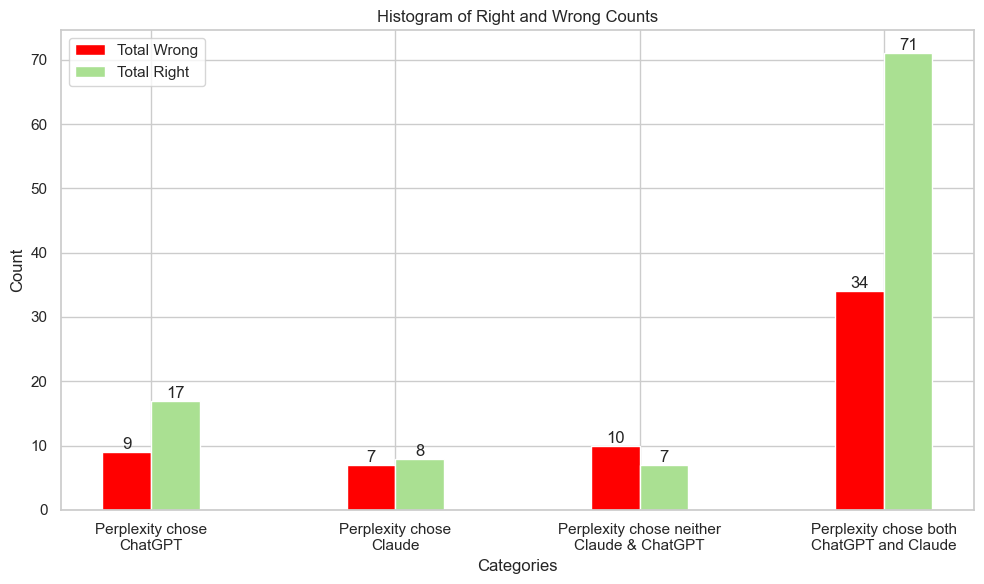

In [43]:
# Data from the table
categories = ["Perplexity chose\nChatGPT", "Perplexity chose\nClaude",
              "Perplexity chose neither\nClaude & ChatGPT",
              "Perplexity chose both\nChatGPT and Claude"]
total_wrong = [9, 7, 10, 34]
total_right = [17, 8, 7, 71]

# Bar positions
x = np.arange(len(categories))

# Bar width
bar_width = 0.2

# Colors for the bars using HTML color codes
wrong_color = '#FF0000'
right_color = '#AAE092'

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - bar_width/2, total_wrong, bar_width, label="Total Wrong", color=wrong_color)
bars2 = ax.bar(x + bar_width/2, total_right, bar_width, label="Total Right", color=right_color)

# Adding labels, title, and legend
ax.set_xlabel("Categories")
ax.set_ylabel("Count")
ax.set_title("Histogram of Right and Wrong Counts")
ax.set_xticks(x)
ax.set_xticklabels(categories) # No rotation needed now
ax.legend()

# Adding value annotations
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [35]:
# Create Perplexity_potential
Perplexity_potential_correct = GPT4o_correct | Perplexity_correct | Claude_correct
Perplexity_potential_correct

0       True
1       True
2      False
3       True
4       True
       ...  
158     True
159     True
160     True
161    False
162     True
Length: 163, dtype: bool

In [36]:
#accuracy of Perplexity potential
np.mean(Perplexity_potential_correct)

0.7914110429447853

In [37]:
#Confidence interval Perplexity Potential
print("Perplexity upper and lower bound:",proportion_confint(np.sum(Perplexity_potential_correct), len(Perplexity_potential_correct)))

Perplexity upper and lower bound: (0.7290374160511649, 0.8537846698384056)


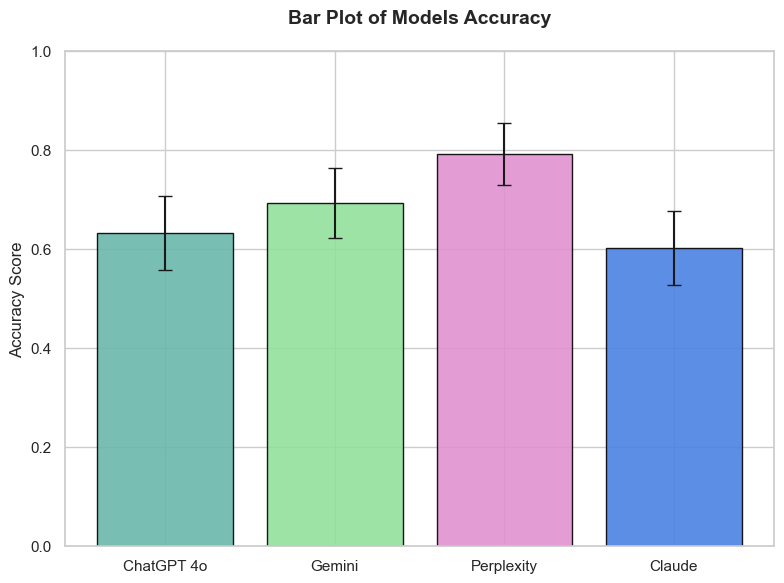

In [38]:
#Data
models = ['ChatGPT 4o', 'Gemini', 'Perplexity', 'Claude']
accuracy = [0.6319018404907976,0.6932515337423313 , 0.7914110429447853, 0.6012269938650306]
lower_bound = [0.6012269938650306, 0.6224584373274412, 0.7290374160511649, 0.5260584044390468]
upper_bound = [0.7059409048629655, 0.7640446301572213, 0.8537846698384056, 0.6763955832910145]

#Calculate the errors
error = [upper - acc for upper, acc in zip(upper_bound, accuracy)]

#Set the Seaborn style
sns.set(style="whitegrid")
colors = ['#6BB7AB', '#92E09D', '#E092D0', '#4A82E3']  

#Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(
    models, 
    accuracy, 
    yerr=error, 
    capsize=5, 
    color=colors, 
    edgecolor="black", 
    alpha=0.9
)

#Customize the plot
plt.ylim(0, 1)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Bar Plot of Models Accuracy', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()

#Show the plot
plt.show()


In [39]:
#Cochrans Q test
print(cochrans_q([GPT4o_correct,Gemini_correct,Perplexity_potential_correct,Claude_correct]))

df          162
pvalue      5.741259992104223e-22
statistic   398.6952979721952


In [40]:
#Posthoc analysis
Posthoc = pd.crosstab(GPT4o_correct, Perplexity_potential_correct)
print(mcnemar(Posthoc))

Posthoc = pd.crosstab(Gemini_correct, Perplexity_potential_correct)
print(mcnemar(Posthoc))

Posthoc = pd.crosstab(Perplexity_potential_correct, Claude_correct)
print(mcnemar(Posthoc))

pvalue      2.9802322387695312e-08
statistic   0.0
pvalue      0.013852965261321515
statistic   11.0
pvalue      9.313225746154785e-10
statistic   0.0
